In [210]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [211]:
df = pd.read_csv(r'D:\UOP\4th year\Research\EDA\Data\cancat.csv')

In [235]:
districts = gpd.read_file(r'D:\UOP\4th year\Research\District_geo.json')

districts.rename(columns={'ADM2_EN': 'District'}, inplace=True)

districts = districts[districts['District'] != '[unknown]']

# Create a list of unique regions
unique_regions = df['Region'].unique()

# Create a dropdown widget for region selection
region_selector = widgets.Dropdown(options=unique_regions, description='Select Region')

def update_map(selected_region):
    plt.clf()
    region_data = df[df['Region'] == selected_region]

    merged_data = districts.merge(region_data, on='District', how='left')
    merged_data['Region'].fillna('Other', inplace=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    
    merged_data.plot(column='Region', cmap='Greens', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

    merged_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', va='bottom'), axis=1)

    plt.title(f'Elephant Deaths in {selected_region}')
    
    plt.show()

widgets.interactive(update_map, selected_region=region_selector)


interactive(children=(Dropdown(description='Select Region', options=('Southern', 'North Western', 'Eastern', '…

<Axes: title={'center': 'Total Elephant Deaths by Region'}, ylabel='Region'>

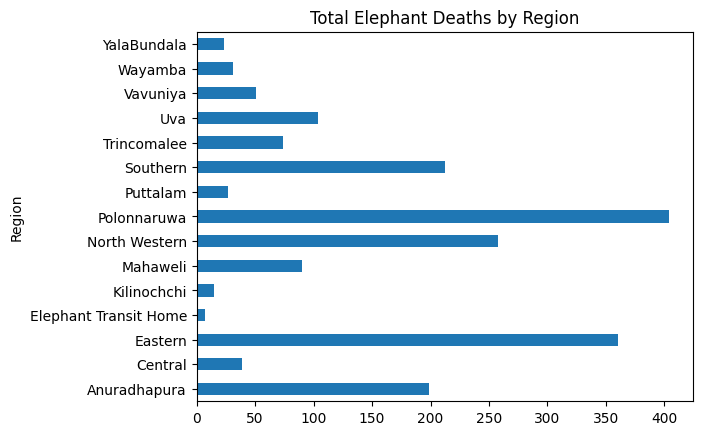

In [213]:
region_groups = df.groupby('Region')
total_deaths_by_region = region_groups.size()
total_deaths_by_region.plot(kind='barh', title='Total Elephant Deaths by Region')

## Get the top 3 Regions
+ Polonnaruwa
+ North Western
+ Eastern

In [214]:
top_3_regions = ['Polonnaruwa', 'North Western', 'Eastern']

top_regions = df[df['Region'].isin(top_3_regions)]
top_regions = top_regions.reset_index(drop=True)
top_regions['No'] = top_regions.index + 1

top_regions.head()

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
1,2,Eastern,Ampara,Thirikkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
2,3,North Western,Kurunegala,Ipologama,2010-01-15,Accident,Male,5,Juvenile
3,4,North Western,Kurunegala,Pannala,2010-01-16,Gunshot,Male,35-40,Subadults and adults
4,5,North Western,Puttalam,Unknown,2010-01-20,Gunshot,Male,7,Juvenile


In [215]:
top_regions['Region'].value_counts()

Region
Polonnaruwa      404
Eastern          360
North Western    258
Name: count, dtype: int64

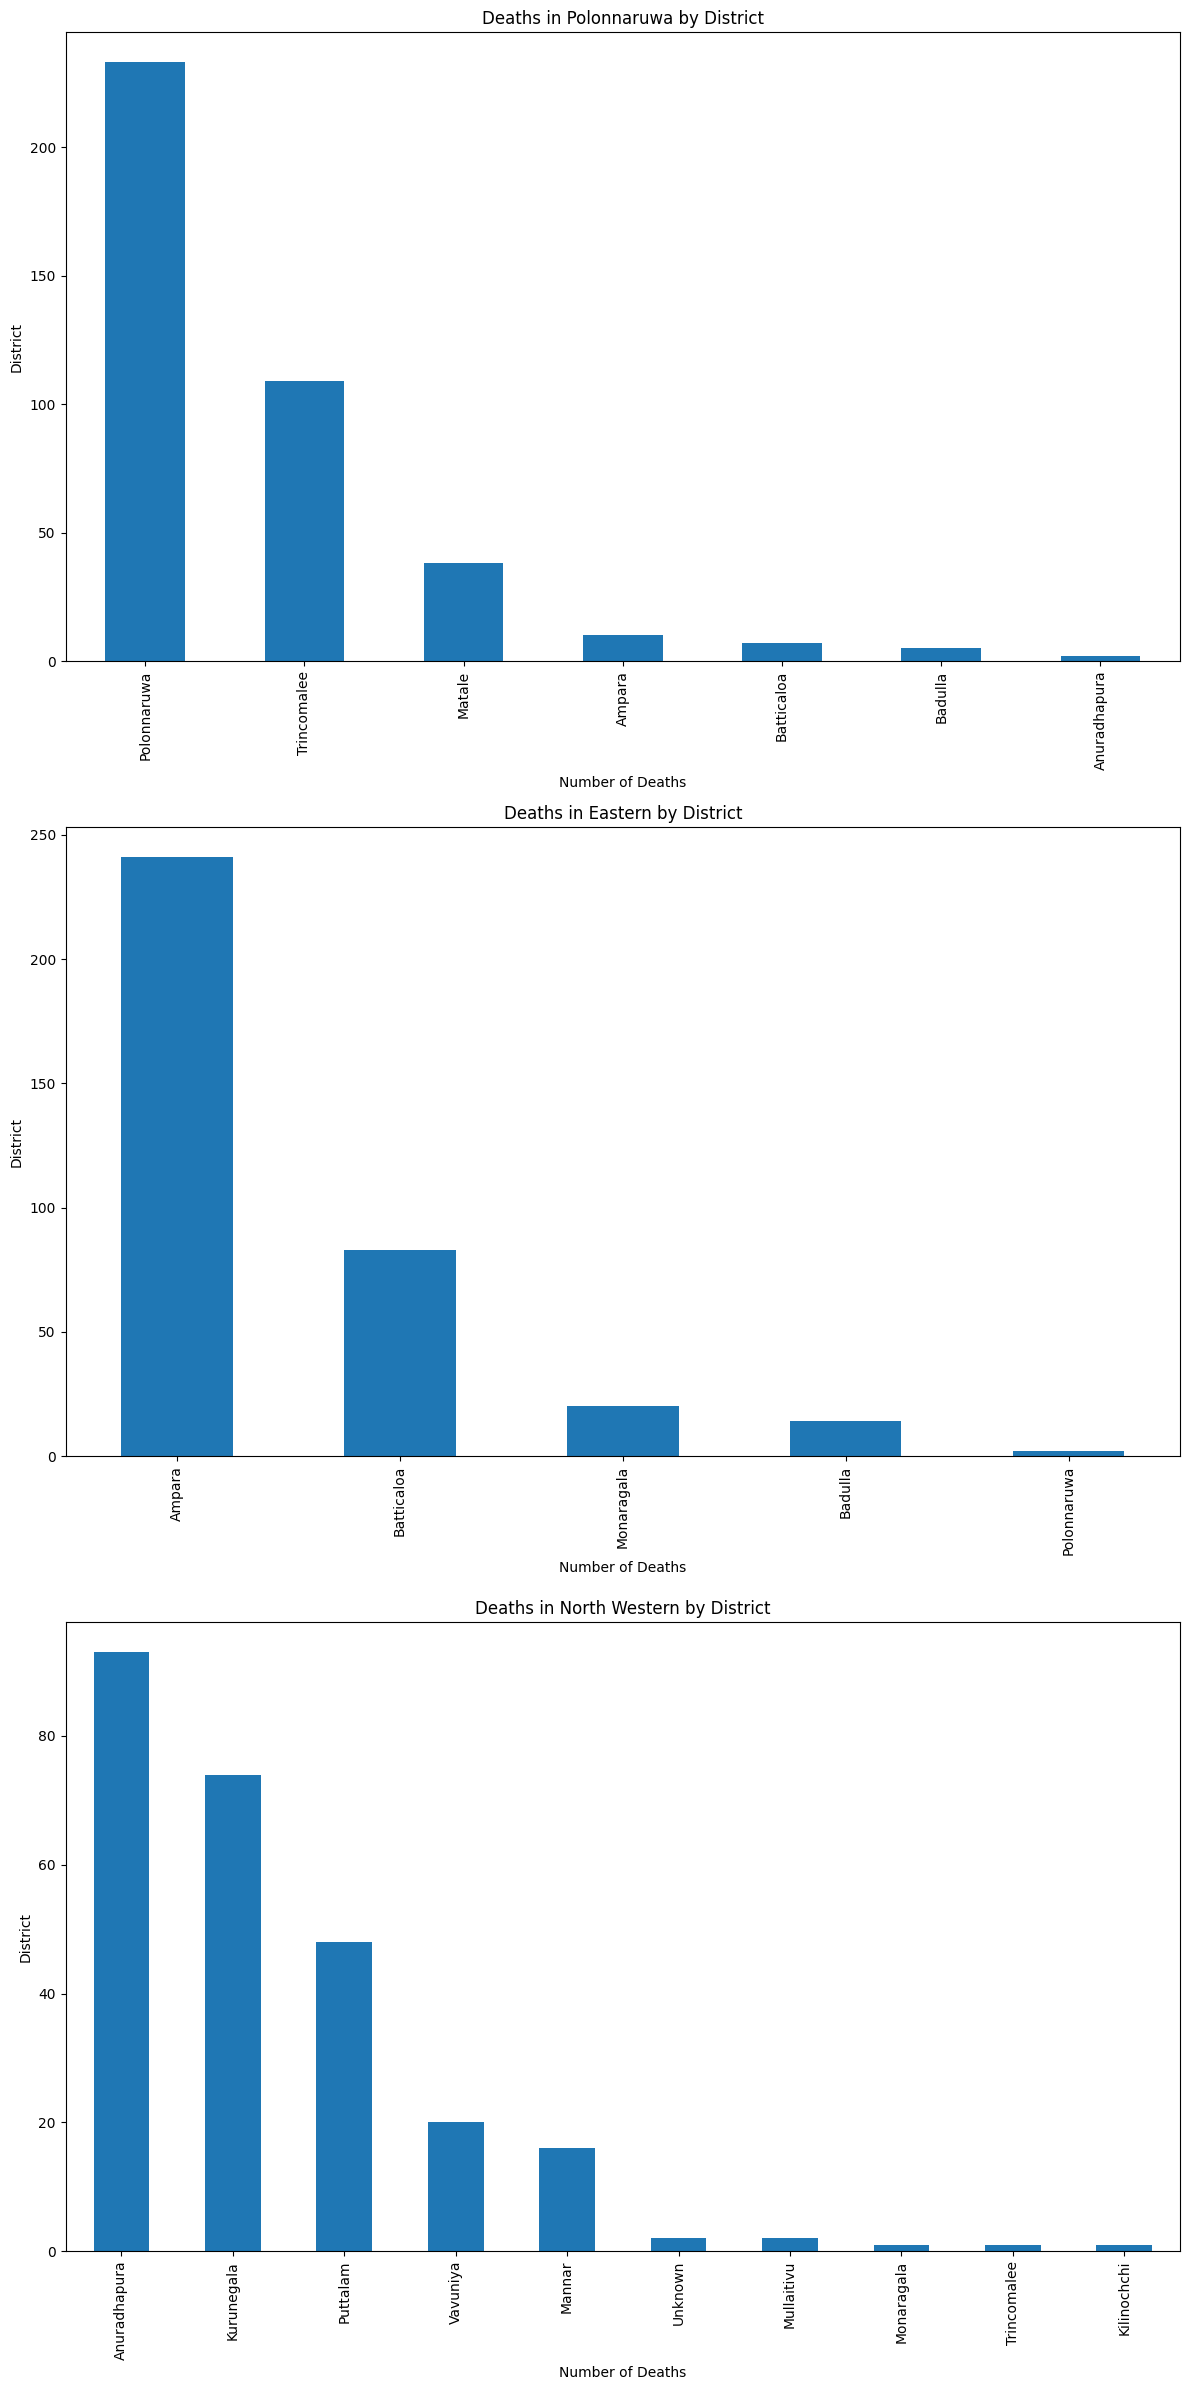

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

region_deaths = df['Region'].value_counts()

top_3_regions = region_deaths.head(3).index
fig, axes = plt.subplots(len(top_3_regions), 1, figsize=(12, 8 * len(top_3_regions)))

for i, region in enumerate(top_3_regions):
    region_data = df[df['Region'] == region]
    
    district_deaths = region_data['District'].value_counts()
    
    ax = axes[i]
    district_deaths.plot(kind='bar', ax=ax)
    ax.set_title(f'Deaths in {region} by District')
    ax.set_xlabel('Number of Deaths')
    ax.set_ylabel('District')

plt.tight_layout()
plt.show()


In [217]:
new_df=top_regions[top_regions["Cause of Death"]!='Unknown']
cross_tab = pd.crosstab(new_df['Region'], new_df['Cause of Death'])

cross_tab

Cause of Death,Accident,Attack by an elephant,Body destroyed,Broken the Spinal,Disease,Drought,Drowned,Eaten polythene,Electrocuted,Fallen into well,...,Hakkapatas,Injured,Land mine,Natural,Nivukeniya,Other,Poisned,Septicemia,Severe hemorrhage,Train Accident
Region,,,,,,,,,,,,,,,,,,,,,
Eastern,6,1,10,0,7,0,1,3,32,1,...,63,11,1,10,0,9,16,12,1,3
North Western,27,0,2,0,0,1,0,0,22,0,...,28,7,5,2,1,9,24,0,0,10
Polonnaruwa,17,1,10,1,3,0,2,3,25,2,...,86,10,2,11,0,23,10,0,0,28


In [218]:
cross_tab = pd.crosstab(new_df['Region'], new_df['Cause of Death'])

cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent_transposed = cross_tab_percent.T
cross_tab_percent_transposed

Region,Eastern,North Western,Polonnaruwa
Cause of Death,,,
Accident,2.105263,13.043478,5.396825
Attack by an elephant,0.350877,0.000000,0.317460
Body destroyed,3.508772,0.966184,3.174603
Broken the Spinal,0.000000,0.000000,0.317460
Disease,2.456140,0.000000,0.952381
Drought,0.000000,0.483092,0.000000
Drowned,0.350877,0.000000,0.634921
Eaten polythene,1.052632,0.000000,0.952381
Electrocuted,11.228070,10.628019,7.936508


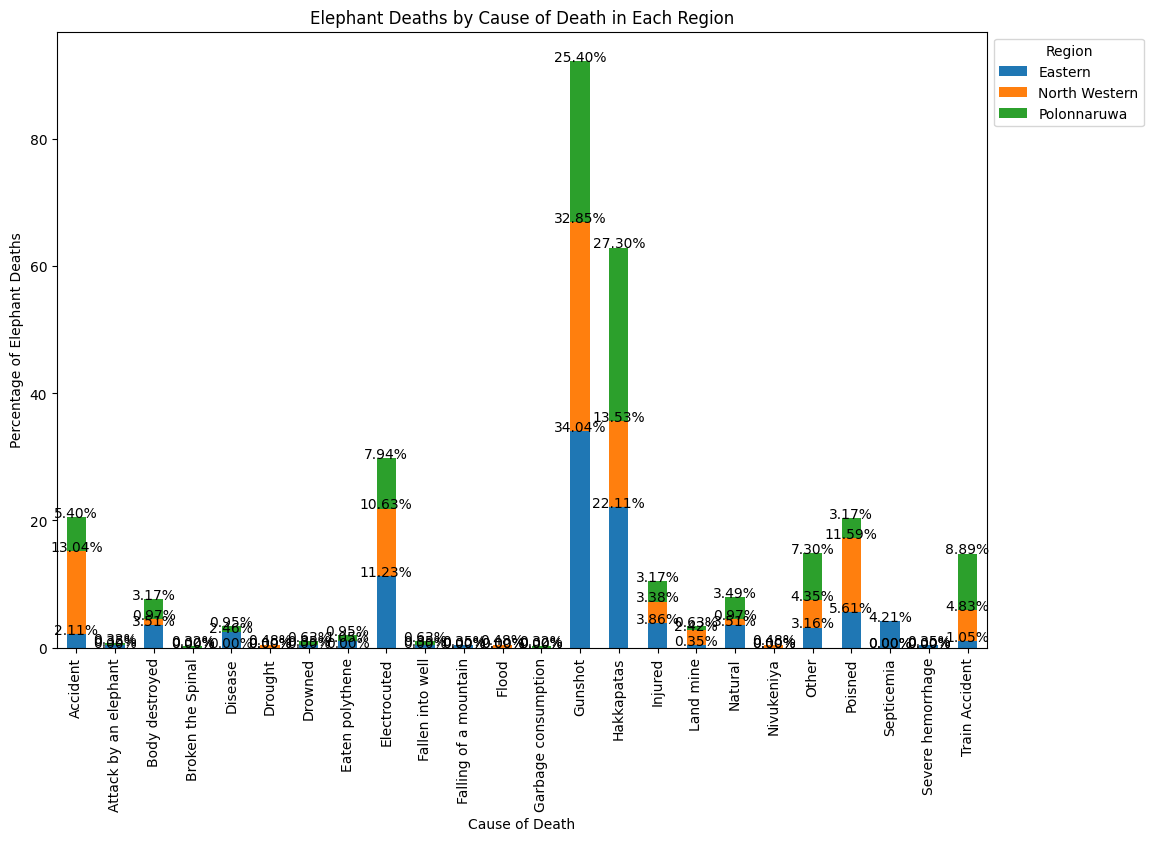

In [219]:
ax = cross_tab_percent_transposed.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Elephant Deaths by Cause of Death in Each Region')
plt.xlabel('Cause of Death')
plt.ylabel('Percentage of Elephant Deaths')

plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')

plt.show()



In [220]:
new_df=top_regions[top_regions["Sex"]!='Unknown']
cross_tab = pd.crosstab(new_df['Region'], new_df['Sex'])
cross_tab


Sex,Calf,Female,Male
Region,,,
Eastern,2,94,249
North Western,0,87,148
Polonnaruwa,2,116,260


In [221]:
cross_tab = pd.crosstab(new_df['Region'], new_df['Sex'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent_transposed = cross_tab_percent.T
cross_tab_percent_transposed

Region,Eastern,North Western,Polonnaruwa
Sex,,,
Calf,0.579710,0.000000,0.529101
Female,27.246377,37.021277,30.687831
Male,72.173913,62.978723,68.783069


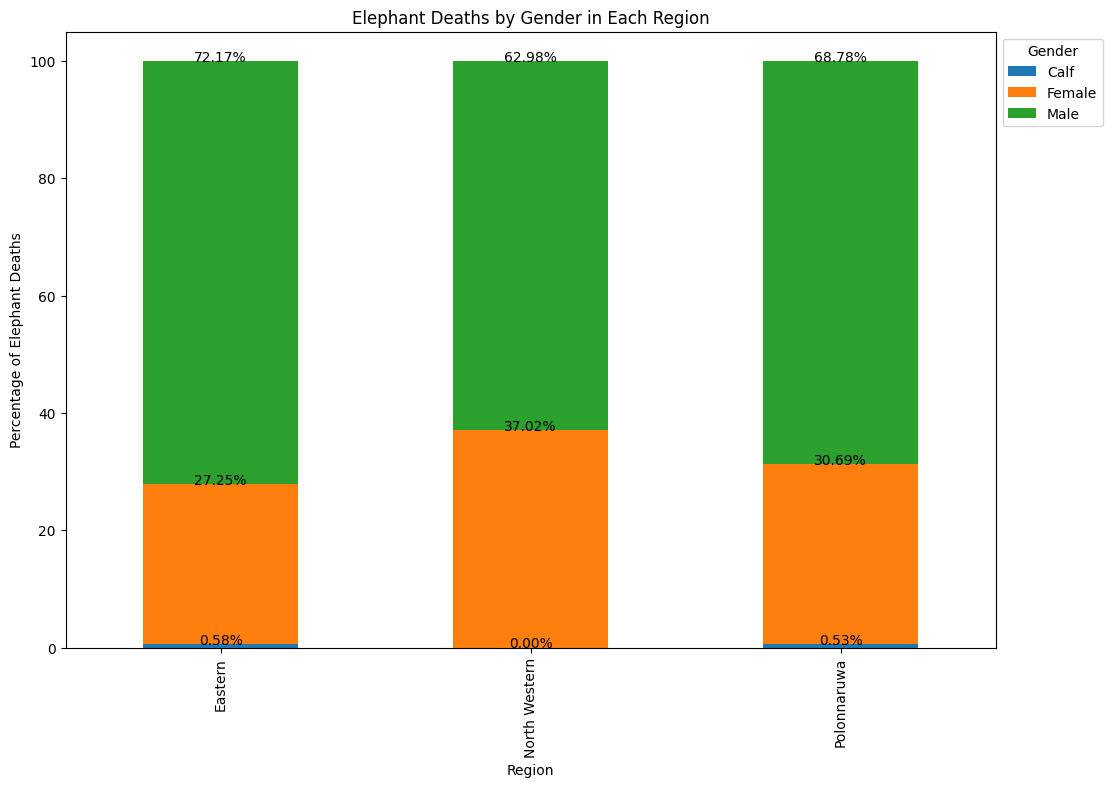

In [222]:
ax = cross_tab_percent.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Elephant Deaths by Gender in Each Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Elephant Deaths')

plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')


plt.show()


In [223]:
df.head(1)

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,Southern,Monaragala,Kataragama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults


In [224]:
new_df=top_regions[top_regions["Age Category"]!='Unknown']
cross_tab = pd.crosstab(new_df['Region'], new_df['Age Category'])
cross_tab


Age Category,Calf,Infant,Juvenile,Subadults and adults
Region,,,,
Eastern,19,15,52,246
North Western,24,8,38,162
Polonnaruwa,26,11,69,275


In [225]:
cross_tab = pd.crosstab(new_df['Region'], new_df['Age Category'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent_transposed = cross_tab_percent.T
cross_tab_percent_transposed

Region,Eastern,North Western,Polonnaruwa
Age Category,,,
Calf,5.722892,10.344828,6.824147
Infant,4.518072,3.448276,2.887139
Juvenile,15.662651,16.379310,18.110236
Subadults and adults,74.096386,69.827586,72.178478


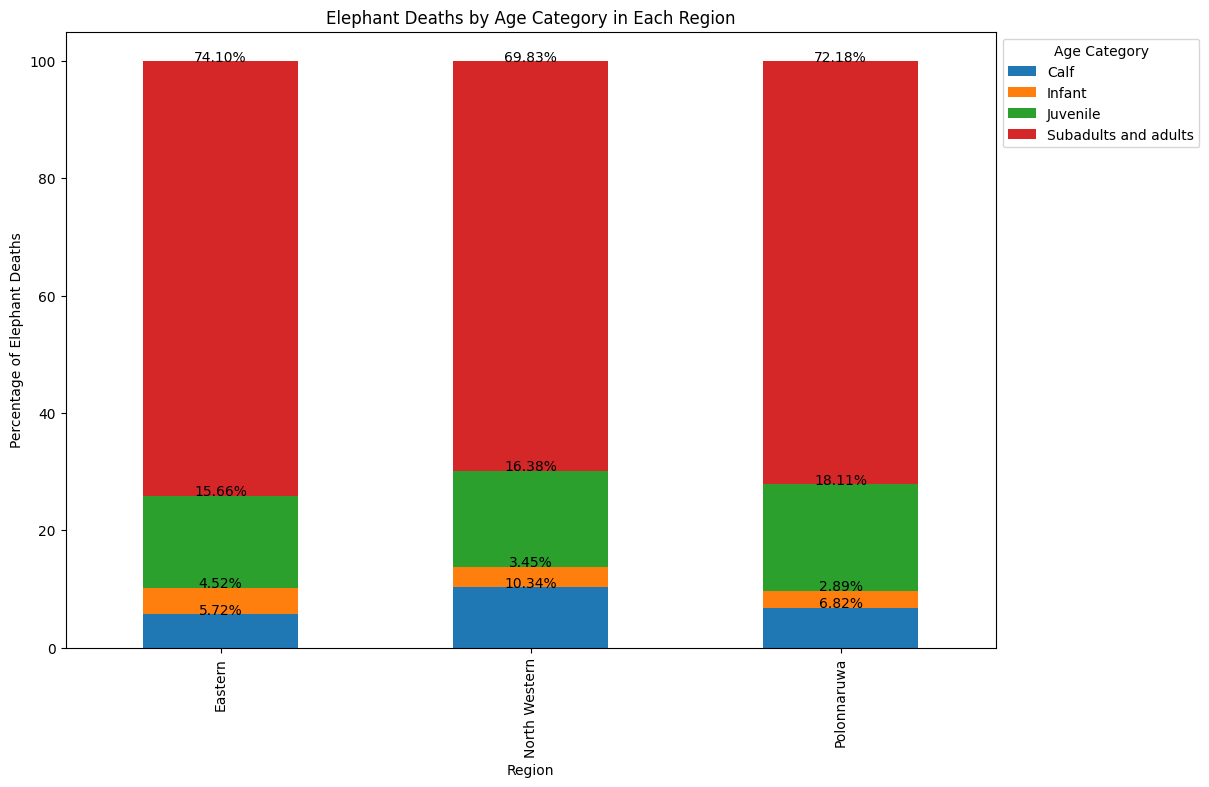

In [226]:
ax = cross_tab_percent.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Elephant Deaths by Age Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Elephant Deaths')

plt.legend(title='Age Category', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')


plt.show()
